In [ ]:
import pandas as pd
import numpy as np
import re
import os
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1]:

# First, let's recreate the processed datasets
def process_log_file(filename):
    """Process a single log file and return structured DataFrame"""

    with open(filename, 'r') as file:
        content = file.read()

    # Normalize whitespace
    text = content.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text)

    # Extract coordinate and feature data
    coord_pattern = r'\(array\(\[([^\]]+)\]\),\s*array\(\[([^\]]+)\]\),\s*array\(\[([^\]]+)\]\)\)'
    feature_pattern = r'\(\[([^\]]+)\],\s*\[([^\]]+)\],\s*\[([^\]]+)\]\)'

    coord_matches = re.findall(coord_pattern, text)
    feature_matches = re.findall(feature_pattern, text)

    def parse_numeric_array(array_str):
        array_str = re.sub(r'np\.float64\(([^)]+)\)', r'\1', array_str)
        values = [float(x.strip()) for x in array_str.split(',')]
        return values

    processed_samples = []

    for i in range(min(len(coord_matches), len(feature_matches))):
        x_coords = parse_numeric_array(coord_matches[i][0])
        y_coords = parse_numeric_array(coord_matches[i][1])
        z_coords = parse_numeric_array(coord_matches[i][2])

        output_vals = parse_numeric_array(feature_matches[i][0])
        result_vals = parse_numeric_array(feature_matches[i][1])
        additional_features = parse_numeric_array(feature_matches[i][2])

        if len(x_coords) == len(y_coords) == len(z_coords) == len(output_vals) == len(result_vals) == len(additional_features) == 8:
            sample_data = {'sample_id': i}

            # Add features
            for j in range(8):
                sample_data[f'x{j+1}'] = x_coords[j]
            for j in range(8):
                sample_data[f'y{j+1}'] = y_coords[j]
            for j in range(8):
                sample_data[f'z{j+1}'] = z_coords[j]
            for j in range(8):
                sample_data[f't{j+1}'] = additional_features[j]

            # Add outputs
            for j in range(8):
                sample_data[f'output{j+1}'] = output_vals[j]
            for j in range(8):
                sample_data[f'result{j+1}'] = result_vals[j]

            processed_samples.append(sample_data)

    return pd.DataFrame(processed_samples)

# Process all log files
log_files = [
    'run1(8).log', 'run2(8).log', 'run3(8).log', 'run4(8).log', 'run5(8).log',
    'run6(8).log', 'run7(8).log', 'run8(8).log', 'run9(8).log', 'run10(8).log'
]

print("=== PROCESSING LOG FILES ===")
datasets = {}

PATH_RAW_DATA = "dataset/raw_nodes/8/"
for filename in log_files:
    path = PATH_RAW_DATA + filename
    print(f"Processing {filename}...")
    df = process_log_file(path)
    datasets[filename] = df
    print(f"  ✅ {len(df)} samples processed")

print(f"\nProcessed {len(datasets)} files successfully")

# path_processed = 'dataset/processed/8/'
# os.makedirs(path_processed, exist_ok=True)
# for key in datasets.keys():
#     datasets[key].to_csv(path_processed+ key.replace('.log', '') + '_processed.csv', index=False)

=== PROCESSING LOG FILES ===
Processing run1(8).log...
  ✅ 100 samples processed
Processing run2(8).log...
  ✅ 100 samples processed
Processing run3(8).log...
  ✅ 100 samples processed
Processing run4(8).log...
  ✅ 100 samples processed
Processing run5(8).log...
  ✅ 100 samples processed
Processing run6(8).log...
  ✅ 100 samples processed
Processing run7(8).log...
  ✅ 100 samples processed
Processing run8(8).log...
  ✅ 100 samples processed
Processing run9(8).log...
  ✅ 100 samples processed
Processing run10(8).log...
  ✅ 100 samples processed

Processed 10 files successfully


In [11]:
path_processed = 'dataset/processed/8/'
os.makedirs(path_processed, exist_ok=True)
for key in datasets.keys():
    datasets[key].to_csv(path_processed+ key.replace('.log', '') + '_processed.csv', index=False)

In [28]:
datasets.keys()

dict_keys(['run1(8).log', 'run2(8).log', 'run3(8).log', 'run4(8).log', 'run5(8).log', 'run6(8).log', 'run7(8).log', 'run8(8).log', 'run9(8).log', 'run10(8).log'])

In [29]:
datasets['run1(8).log']

,sample_id,x1,x2,x3,x4,x5,x6,x7,x8,y1,...,output7,output8,result1,result2,result3,result4,result5,result6,result7,result8
0,0,-19.787653,-29.597232,13.571921,34.918137,-45.652977,-12.734779,-47.595371,-16.840940,2.134880,...,4.97,6.10,88.944955,93.179943,99.417029,98.629803,90.904482,91.453743,98.348981,99.667813
1,1,-19.348281,-26.363454,13.586494,31.714747,-44.375897,-11.728088,-39.367776,-7.864871,0.228404,...,5.23,6.05,89.059855,92.750198,99.391359,98.849241,90.224593,90.533642,97.548548,99.322737
2,2,-18.908947,-23.129688,13.601067,28.511396,-43.098817,-10.721397,-31.140181,1.111197,-1.677905,...,5.51,5.58,89.176029,89.623870,99.372167,98.940842,89.618624,89.764418,95.957141,98.156841
3,3,-18.469661,-19.895936,13.615641,25.308090,-41.821737,-9.714706,-22.912585,10.087266,-3.584008,...,5.81,5.11,91.023099,89.015260,99.316156,99.065781,89.185296,89.211580,93.478596,98.097876
4,4,-18.030433,-16.662202,13.630214,22.104837,-40.544658,-8.708015,-14.684990,12.612089,-5.489858,...,6.11,4.97,93.197329,88.989409,99.278331,99.229386,88.965171,88.960383,90.216688,98.115314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-32.612135,-10.332542,-9.171211,17.727790,8.567185,22.042590,22.924505,7.795235,-38.342507,...,4.82,5.05,88.914697,88.914548,96.612965,97.400025,99.841546,99.241120,94.493247,99.732552
96,96,-34.705703,-8.954166,-10.420286,18.928662,6.459379,22.707510,15.076576,-6.034493,-41.581699,...,4.90,5.30,88.914700,88.932187,97.820574,97.770942,99.837973,98.902614,93.805080,99.804995
97,97,-36.775379,-7.575792,-11.668883,20.129535,4.351874,23.371697,7.228647,-19.864221,-44.783924,...,4.94,5.59,88.917960,89.465274,98.493422,97.625968,99.833930,98.344828,93.320761,99.838400
98,98,-36.874908,-6.197421,-12.916887,21.330408,2.244764,24.034678,-0.619282,-33.693948,-44.937917,...,4.95,6.03,89.010781,91.609494,98.895487,96.935896,99.826794,97.508949,92.940902,99.836486


In [30]:
print(f"\n=== TEMPORAL SPLITTING ===")
print("Strategy: First 80 samples → Train, Next 10 → Val, Last 10 → Test")

train_dfs = []
val_dfs = []
test_dfs = []

for filename, df in datasets.items():
    # Ensure temporal order
    df = df.sort_values('sample_id').reset_index(drop=True)

    # Split temporally
    train_df = df.iloc[0:80].copy()
    val_df = df.iloc[80:90].copy()
    test_df = df.iloc[90:100].copy()

    # Add run identifier
    run_num = int(filename.replace('run', '').replace('(8).log', ''))
    train_df['run_id'] = run_num
    val_df['run_id'] = run_num
    test_df['run_id'] = run_num

    train_dfs.append(train_df)
    val_dfs.append(val_df)
    test_dfs.append(test_df)

    print(f"Run {run_num}: Train {len(train_df)}, Val {len(val_df)}, Test {len(test_df)}")


=== TEMPORAL SPLITTING ===
Strategy: First 80 samples → Train, Next 10 → Val, Last 10 → Test
Run 1: Train 80, Val 10, Test 10
Run 2: Train 80, Val 10, Test 10
Run 3: Train 80, Val 10, Test 10
Run 4: Train 80, Val 10, Test 10
Run 5: Train 80, Val 10, Test 10
Run 6: Train 80, Val 10, Test 10
Run 7: Train 80, Val 10, Test 10
Run 8: Train 80, Val 10, Test 10
Run 9: Train 80, Val 10, Test 10
Run 10: Train 80, Val 10, Test 10


In [31]:
train_dfs[0]

,sample_id,x1,x2,x3,x4,x5,x6,x7,x8,y1,...,output8,result1,result2,result3,result4,result5,result6,result7,result8,run_id
0,0,-19.787653,-29.597232,13.571921,34.918137,-45.652977,-12.734779,-47.595371,-16.840940,2.134880,...,6.10,88.944955,93.179943,99.417029,98.629803,90.904482,91.453743,98.348981,99.667813,1
1,1,-19.348281,-26.363454,13.586494,31.714747,-44.375897,-11.728088,-39.367776,-7.864871,0.228404,...,6.05,89.059855,92.750198,99.391359,98.849241,90.224593,90.533642,97.548548,99.322737,1
2,2,-18.908947,-23.129688,13.601067,28.511396,-43.098817,-10.721397,-31.140181,1.111197,-1.677905,...,5.58,89.176029,89.623870,99.372167,98.940842,89.618624,89.764418,95.957141,98.156841,1
3,3,-18.469661,-19.895936,13.615641,25.308090,-41.821737,-9.714706,-22.912585,10.087266,-3.584008,...,5.11,91.023099,89.015260,99.316156,99.065781,89.185296,89.211580,93.478596,98.097876,1
4,4,-18.030433,-16.662202,13.630214,22.104837,-40.544658,-8.708015,-14.684990,12.612089,-5.489858,...,4.97,93.197329,88.989409,99.278331,99.229386,88.965171,88.960383,90.216688,98.115314,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,9.417899,-9.356990,15.848363,-6.289665,33.285952,8.713034,-12.635657,-30.737387,26.686833,...,5.46,91.646943,89.931866,96.442565,96.478435,99.205136,90.906670,99.350834,88.993383,1
76,76,7.315859,-10.185454,14.596662,-5.088793,32.314571,9.379860,-13.666379,-34.992782,23.434531,...,5.46,91.992799,89.782551,95.777844,97.246076,99.083431,91.590889,99.356006,89.783755,1
77,77,5.213825,-11.013895,13.344997,-3.887920,31.343213,10.046675,-6.320295,-28.554383,20.182241,...,5.59,93.305218,90.612337,94.994957,97.855440,98.859015,92.550604,99.532451,91.888614,1
78,78,3.111799,-11.842306,12.093369,-2.687047,30.371885,10.713479,1.025790,-22.115983,16.929963,...,5.63,90.415912,89.720038,93.967762,98.391327,98.513519,93.747749,99.418166,93.680469,1


In [32]:
import pandas as pd

In [35]:
df = pd.read_csv('results_simple_models/results_simple_models_10_3seeds_avg_std.csv')

In [37]:
df

,model,seed_mean,seed_std,train_mse_mean,train_mse_std,train_rmse_mean,train_rmse_std,train_mae_mean,train_mae_std,train_r2_mean,...,val_r2_mean,val_r2_std,test_mse_mean,test_mse_std,test_rmse_mean,test_rmse_std,test_mae_mean,test_mae_std,test_r2_mean,test_r2_std
0,ElasticNet,555.25,980.69172,2.473161e-02,0.000000e+00,1.572629e-01,0.000000e+00,1.105541e-01,0.000000e+00,0.493160,...,0.214816,0.000000,0.026362,0.000000,0.162364,0.000000,0.110436,0.000000,0.442246,0.000000
1,Extra Trees,555.25,980.69172,2.500000e-12,5.000000e-12,7.905694e-07,1.581139e-06,1.250000e-08,2.500000e-08,1.000000,...,0.497161,0.008141,0.022866,0.000222,0.151214,0.000735,0.088782,0.000656,0.455029,0.009069
2,Gradient Boosting,555.25,980.69172,7.996693e-04,3.312292e-19,2.827843e-02,6.009258e-18,1.935691e-02,8.012345e-18,0.985247,...,0.345483,0.001557,0.024856,0.000090,0.157656,0.000287,0.094087,0.000178,0.401984,0.004228
3,K-Nearest Neighbors,555.25,980.69172,1.056642e-02,0.000000e+00,1.027931e-01,0.000000e+00,5.779475e-02,0.000000e+00,0.944568,...,-0.138434,0.000000,0.107776,0.000000,0.328292,0.000000,0.223452,0.000000,-0.032898,0.000000
4,Linear Regression,555.25,980.69172,1.360717e-02,0.000000e+00,1.166498e-01,0.000000e+00,7.509110e-02,0.000000e+00,0.703005,...,-0.666824,0.000000,0.038016,0.000000,0.194977,0.000000,0.133915,0.000000,0.069191,0.000000
5,Random Forest,555.25,980.69172,3.957943e-04,1.076413e-05,1.989321e-02,2.697222e-04,1.072216e-02,1.129376e-04,0.994414,...,0.384722,0.010174,0.025992,0.000602,0.161213,0.001867,0.095651,0.001103,0.350006,0.022179
6,Ridge Regression,555.25,980.69172,1.364436e-02,0.000000e+00,1.168091e-01,0.000000e+00,7.473641e-02,0.000000e+00,0.702187,...,-0.533717,0.000000,0.036114,0.000000,0.190037,0.000000,0.130222,0.000000,0.121205,0.000000
7,Support Vector Regression,555.25,980.69172,4.592666e-03,0.000000e+00,6.776921e-02,0.000000e+00,5.892077e-02,0.000000e+00,0.922371,...,0.287502,0.000000,0.038430,0.000000,0.196037,0.000000,0.138159,0.000000,0.341899,0.000000


,model,seed_mean,seed_std,train_mse_mean,train_mse_std,train_rmse_mean,train_rmse_std,train_mae_mean,train_mae_std,train_r2_mean,...,val_r2_mean,val_r2_std,test_mse_mean,test_mse_std,test_rmse_mean,test_rmse_std,test_mae_mean,test_mae_std,test_r2_mean,test_r2_std
0,ElasticNet,555.25,980.69172,2.473161e-02,0.000000e+00,1.572629e-01,0.000000e+00,1.105541e-01,0.000000e+00,0.493160,...,0.214816,0.000000,0.026362,0.000000,0.162364,0.000000,0.110436,0.000000,0.442246,0.000000
1,Extra Trees,555.25,980.69172,2.500000e-12,5.000000e-12,7.905694e-07,1.581139e-06,1.250000e-08,2.500000e-08,1.000000,...,0.497161,0.008141,0.022866,0.000222,0.151214,0.000735,0.088782,0.000656,0.455029,0.009069
2,Gradient Boosting,555.25,980.69172,7.996693e-04,3.312292e-19,2.827843e-02,6.009258e-18,1.935691e-02,8.012345e-18,0.985247,...,0.345483,0.001557,0.024856,0.000090,0.157656,0.000287,0.094087,0.000178,0.401984,0.004228
3,K-Nearest Neighbors,555.25,980.69172,1.056642e-02,0.000000e+00,1.027931e-01,0.000000e+00,5.779475e-02,0.000000e+00,0.944568,...,-0.138434,0.000000,0.107776,0.000000,0.328292,0.000000,0.223452,0.000000,-0.032898,0.000000
4,Linear Regression,555.25,980.69172,1.360717e-02,0.000000e+00,1.166498e-01,0.000000e+00,7.509110e-02,0.000000e+00,0.703005,...,-0.666824,0.000000,0.038016,0.000000,0.194977,0.000000,0.133915,0.000000,0.069191,0.000000
5,Random Forest,555.25,980.69172,3.957943e-04,1.076413e-05,1.989321e-02,2.697222e-04,1.072216e-02,1.129376e-04,0.994414,...,0.384722,0.010174,0.025992,0.000602,0.161213,0.001867,0.095651,0.001103,0.350006,0.022179
6,Ridge Regression,555.25,980.69172,1.364436e-02,0.000000e+00,1.168091e-01,0.000000e+00,7.473641e-02,0.000000e+00,0.702187,...,-0.533717,0.000000,0.036114,0.000000,0.190037,0.000000,0.130222,0.000000,0.121205,0.000000
7,Support Vector Regression,555.25,980.69172,4.592666e-03,0.000000e+00,6.776921e-02,0.000000e+00,5.892077e-02,0.000000e+00,0.922371,...,0.287502,0.000000,0.038430,0.000000,0.196037,0.000000,0.138159,0.000000,0.341899,0.000000


In [3]:
import pandas as pd
df = pd.read_csv("dataset/processed/10/run1(10)_processed.csv")

In [41]:
df.head()

,sample_id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,result1,result2,result3,result4,result5,result6,result7,result8,result9,result10
0,0,-48.423348,-31.495311,-31.257645,-15.676289,15.799011,-30.157882,14.505522,-43.298909,-8.176879,...,88.963913,88.913835,99.845648,88.914695,89.281048,88.912673,96.914580,96.919917,98.782002,89.704779
1,1,-45.995687,-29.114815,-29.754783,-14.747296,15.773494,-30.666503,14.782290,-43.656390,-6.059394,...,88.914452,88.913634,99.844176,88.914650,89.160686,88.912662,97.325041,96.186427,97.784256,89.616065
2,2,-43.568026,-26.734602,-28.251933,-13.818316,15.747978,-31.175009,15.059058,-44.013858,-3.941909,...,88.913723,88.914387,99.836286,88.914544,89.115960,88.912659,97.625990,95.647854,96.366610,89.232253
3,3,-41.140366,-24.354775,-26.749094,-12.889349,15.722464,-31.683385,15.335824,-44.371309,-1.824424,...,88.914207,88.912489,99.823116,88.914366,89.142308,88.912663,97.829356,95.428896,94.757307,89.045979
4,4,-38.712705,-21.975495,-25.246268,-11.960397,15.696952,-32.191612,15.612590,-44.728739,-0.638288,...,88.914408,88.929566,99.800785,89.017006,89.255427,88.914306,98.049923,95.529261,93.628030,89.156366


,sample_id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,result1,result2,result3,result4,result5,result6,result7,result8,result9,result10
0,0,-48.423348,-31.495311,-31.257645,-15.676289,15.799011,-30.157882,14.505522,-43.298909,-8.176879,...,88.963913,88.913835,99.845648,88.914695,89.281048,88.912673,96.914580,96.919917,98.782002,89.704779
1,1,-45.995687,-29.114815,-29.754783,-14.747296,15.773494,-30.666503,14.782290,-43.656390,-6.059394,...,88.914452,88.913634,99.844176,88.914650,89.160686,88.912662,97.325041,96.186427,97.784256,89.616065
2,2,-43.568026,-26.734602,-28.251933,-13.818316,15.747978,-31.175009,15.059058,-44.013858,-3.941909,...,88.913723,88.914387,99.836286,88.914544,89.115960,88.912659,97.625990,95.647854,96.366610,89.232253
3,3,-41.140366,-24.354775,-26.749094,-12.889349,15.722464,-31.683385,15.335824,-44.371309,-1.824424,...,88.914207,88.912489,99.823116,88.914366,89.142308,88.912663,97.829356,95.428896,94.757307,89.045979
4,4,-38.712705,-21.975495,-25.246268,-11.960397,15.696952,-32.191612,15.612590,-44.728739,-0.638288,...,88.914408,88.929566,99.800785,89.017006,89.255427,88.914306,98.049923,95.529261,93.628030,89.156366


<Axes: >

<Axes: >

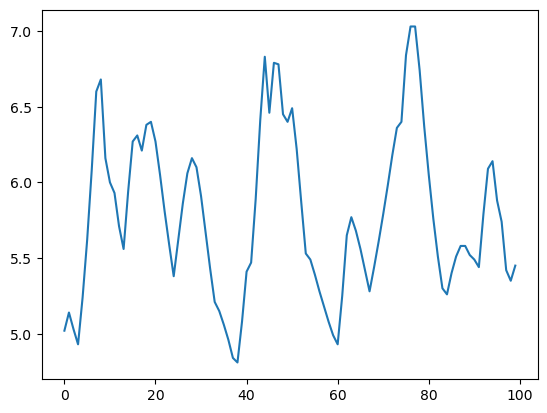

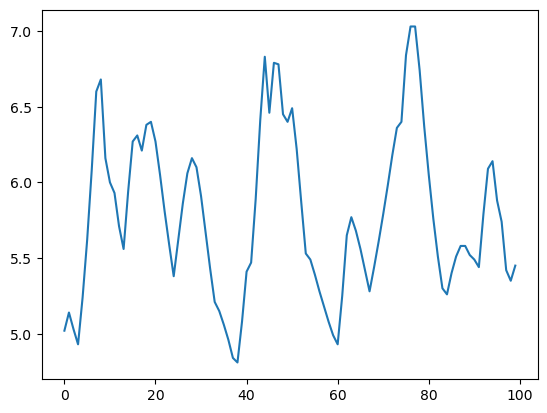

In [45]:
df['t1'].plot()

<Axes: >

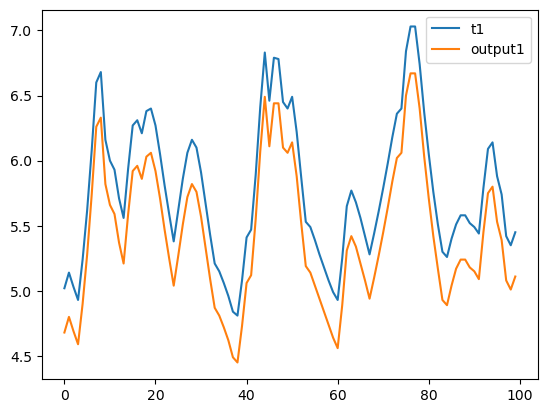

In [9]:
df[['t1', 'output1']].plot()

<Axes: >

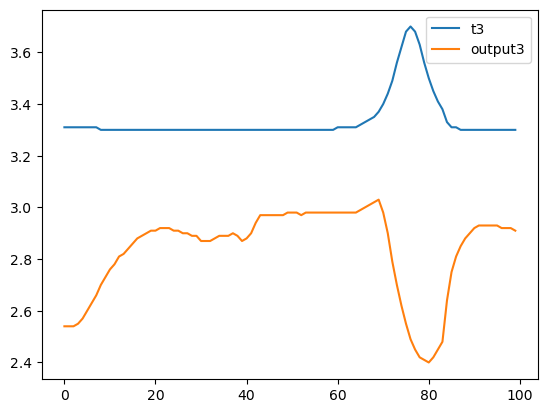

In [10]:
df[['t3', 'output3']].plot()

<Axes: >

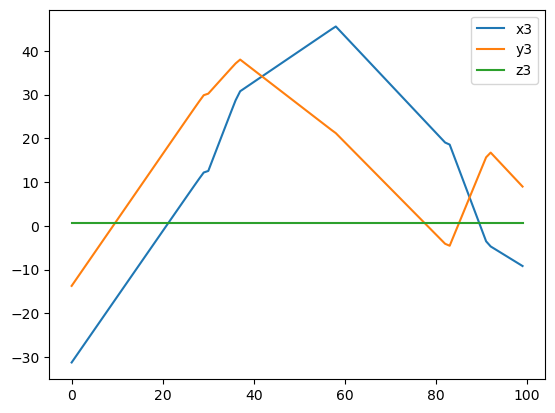

In [13]:
df[['x3', 'y3', 'z3']].plot()

<Axes: xlabel='x3', ylabel='y3'>

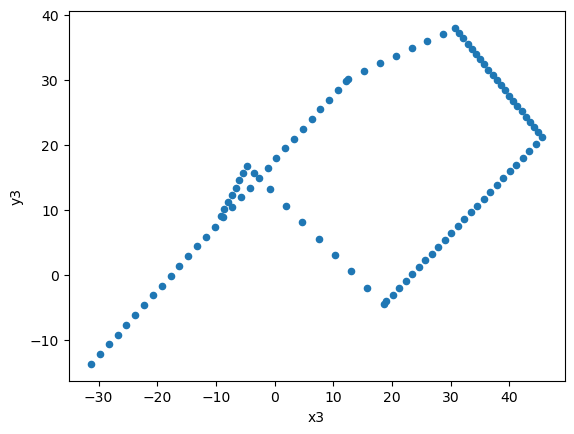

In [16]:
df.plot.scatter(x='x3', y='y3')

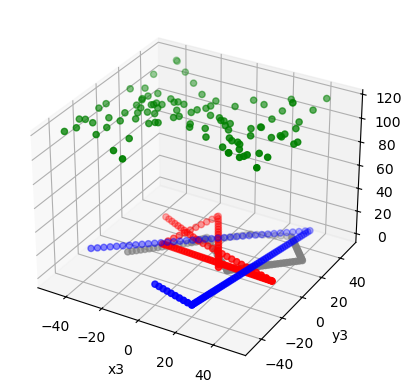

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # (this import registers the 3D projection)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x1'], df['y1'], df['z1'], c='blue', s=20)
ax.scatter(df['x2'], df['y2'], df['z2'], c='red', s=20)
ax.scatter(df['x3'], df['y3'], df['z3'], c='grey', s=20)
ax.scatter(df['x10'], df['y10'], df['z10'], c='green', s=20)


ax.set_xlabel('x3')
ax.set_ylabel('y3')
ax.set_zlabel('z')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # registers 3d projection
import matplotlib.cm as cm
import numpy as np

# Example: df is your pandas DataFrame
# df = ...

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

cmap = cm.get_cmap('tab10')  # 10 distinct colors
marker_list = ['o', '^', 's', 'D', 'v', 'P', '*', 'X', 'h', '8']  # variety of markers

plotted_any = False
for i in range(1, 11):
    x_col = f'x{i}'
    y_col = f'y{i}'
    z_col = f'z{i}'

    # Decide which columns to use
    if all(col in df.columns for col in (x_col, y_col, z_col)):
        x = df[x_col].values
        y = df[y_col].values
        z = df[z_col].values
    elif x_col in df.columns and 'y' in df.columns and 'z' in df.columns:
        x = df[x_col].values
        y = df['y'].values
        z = df['z'].values
    elif x_col in df.columns and y_col in df.columns and 'z' in df.columns:
        x = df[x_col].values
        y = df[y_col].values
        z = df['z'].values
    else:
        print(f"Skipping series {i}: required columns not found.")
        continue

    color = cmap((i-1) % 10)  # tab10 cycles through 10 colors
    marker = marker_list[(i-1) % len(marker_list)]
    ax.scatter(x, y, z, label=f'series {i} ({x_col})', marker=marker, s=30, alpha=0.8, edgecolor='k', linewidth=0.2, c=[color])
    plotted_any = True

if not plotted_any:
    raise ValueError("No valid series found to plot. Check your dataframe column names (x1..x10, y1..y10, z1..z10 or global y,z).")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


<Axes: >

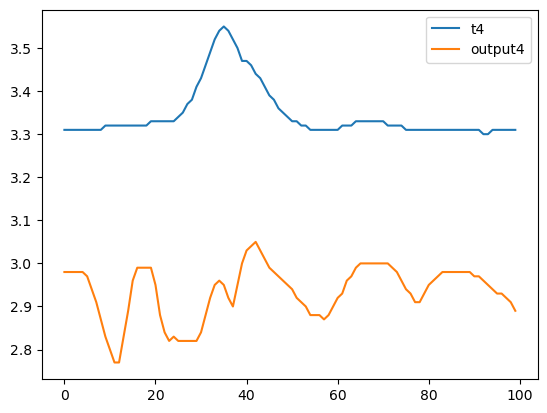

In [12]:
df[['t4', 'output4']].plot()

In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.
